<a href="https://colab.research.google.com/github/SemPhares/Time_serie_classification/blob/master/analyse_exploratoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALL AND LOAD MODULES

In [1]:
!pip install -q packaging==21.3

In [2]:
!pip install -q kats 
#ax-platform

In [3]:
!pip install -q yellowbrick

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import warnings
warnings.simplefilter("ignore")

In [64]:
from tsc_features_extractor import *
import pandas as pd
from PIL import Image
import numpy as np
import plotly.express as px

# Read and prepare data

In [7]:
data = pd.read_pickle("series_and_annotations.pkl")

In [ ]:
data.columns

Index(['sub_video', 'Gender', 'Persuasiveness_rms',
       'PerceivedSelf-Confidence_rms', 'AudienceEngagement_rms',
       'GlobalEvaluation_rms', 'serie', 'viz'],
      dtype='object')

In [ ]:
data[data.serie=='']

,sub_video,Gender,Persuasiveness_rms,PerceivedSelf-Confidence_rms,AudienceEngagement_rms,GlobalEvaluation_rms,serie,viz
207,video_180_sub_207,M,4.153312,4.358899,4.358899,74.904940,,
210,video_182_sub_210,F,3.926406,4.082483,3.829708,69.373386,,
213,video_184_sub_213,M,3.937004,3.464102,3.535534,61.483738,,


In [8]:
data = data[data.serie!='']

# Features extraction

In [ ]:
featured_data = extract_features_from_many_series(data.serie.values)
featured_data.insert(0, 'video_name', data.sub_video.values)

In [11]:
featured_data

,video_name,amplitude,energy,entropy,iqr,mad,max_magnitude_index,min,kurtosis,skewness,...,nowcast_mom,nowcast_ma,nowcast_lag,nowcast_macd,nowcast_macdsign,nowcast_macddiff,seasonal_period,trend_mag,seasonality_mag,residual_std
0,video_0_sub_0,940.100003,32.573503,7.366322,0.502424,0.238387,0.0,5.184130,-0.361586,0.483521,...,-0.018323,5.699712,5.707719,-0.000553,0.003471,0.000223,7,-0.002379,0.0,0.041088
1,video_0_sub_1,941.429999,32.210184,7.375039,0.287504,0.144784,0.0,5.084001,-0.604238,-0.069218,...,0.011379,5.678547,5.673989,0.006513,0.007061,-0.002096,7,0.005161,0.0,0.032458
2,video_0_sub_2,928.290003,31.766120,7.366322,0.510942,0.242082,0.0,5.016294,-0.613468,0.079030,...,0.010025,5.619769,5.613412,0.004533,0.002431,0.003111,7,0.000417,0.0,0.054882
3,video_0_sub_3,811.499997,27.155327,7.285402,0.422083,0.211722,0.0,4.252874,-0.240822,-0.473311,...,0.023152,5.215149,5.202434,0.014904,0.013838,-0.002105,7,0.007992,0.0,0.045445
4,video_0_sub_4,905.499996,30.937824,7.348728,0.364482,0.177480,0.0,4.960355,-0.428566,-0.448368,...,0.005958,5.555152,5.549480,0.007841,0.007650,0.000809,7,0.001050,0.0,0.030575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,video_213_sub_243,890.320005,29.212858,7.366322,0.409172,0.209530,0.0,4.721621,0.291817,0.394299,...,0.014674,5.404090,5.398956,0.014758,0.016590,-0.002589,7,0.007272,0.0,0.050628
241,video_214_sub_244,934.529996,32.993155,7.348728,0.606620,0.233835,0.0,5.001704,-1.026855,-0.524690,...,0.000133,5.725906,5.723400,-0.001826,-0.002779,0.005511,7,-0.002832,0.0,0.035053
242,video_215_sub_245,894.509999,30.655321,7.339850,0.555699,0.258314,0.0,4.620336,-0.459079,-0.260283,...,-0.016421,5.516373,5.520159,0.005368,0.008342,0.004880,7,-0.005944,0.0,0.051392
243,video_216_sub_246,978.679997,34.850377,7.375039,0.479304,0.244684,0.0,5.365293,-0.117998,0.311495,...,0.030395,5.888194,5.872327,0.002429,0.000454,0.002895,7,0.002805,0.0,0.042902


In [ ]:
# list off all columns that have any null or na values
null_col = featured_data.columns[featured_data.isnull().any()].tolist()
null_col

['hw_alpha', 'hw_beta', 'hw_gamma']

In [ ]:
featured_data = featured_data.drop(null_col, axis=1)

In [ ]:
FEATURE_GROUP_MAPING = {'acfpacf_features': ['y_acf1',
                      'y_acf5',
                      'diff1y_acf1',
                      'diff1y_acf5',
                      'diff2y_acf1',
                      'diff2y_acf5',
                      'y_pacf5',
                      'diff1y_pacf5',
                      'diff2y_pacf5',
                      'seas_acf1',
                      'seas_pacf1'],
 'bocp_detector': ['bocp_num', 'bocp_conf_max', 'bocp_conf_mean'],
 'cusum_detector': ['cusum_num',
                    'cusum_conf',
                    'cusum_cp_index',
                    'cusum_delta',
                    'cusum_llr',
                    'cusum_regression_detected',
                    'cusum_stable_changepoint',
                    'cusum_p_value'],
 'holt_params': ['holt_alpha', 'holt_beta'],
 'hw_params': ['hw_alpha', 'hw_beta', 'hw_gamma'],
 'level_shift_features': ['level_shift_idx', 'level_shift_size'],
 'nowcasting': ['nowcast_roc',
                'nowcast_ma',
                'nowcast_mom',
                'nowcast_lag',
                'nowcast_macd',
                'nowcast_macdsign',
                'nowcast_macddiff'],
 'outlier_detector': ['outlier_num'],
 'seasonalities': ['seasonal_period',
                   'trend_mag',
                   'seasonality_mag',
                   'residual_std'],
 'special_ac': ['firstmin_ac', 'firstzero_ac'],
 'statistics': ['length',
                'mean',
                'var',
                'entropy',
                'lumpiness',
                'stability',
                'flat_spots',
                'hurst',
                'std1st_der',
                'crossing_points',
                'binarize_mean',
                'unitroot_kpss',
                'heterogeneity',
                'histogram_mode',
                'linearity'],
 'stl_features': ['trend_strength',
                  'seasonality_strength',
                  'spikiness',
                  'peak',
                  'trough'],

 'trend_detector': ['trend_num', 'trend_num_increasing', 'trend_avg_abs_tau']}

In [ ]:
x = drop_unique_values_columns(featured_data, n_unique = 2)
x = x.drop(['video_name','var','acf_2','acf_3','acf_4','acf_5','acf_6'], axis=1)

In [ ]:
corr = x.corr()
fig = px.imshow(corr,
                x= x.columns,
                y=x.columns
               )
fig.update_xaxes(side="top")
fig.layout.height = 800
fig.layout.width = 800
fig.show()

## Cluster the data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# import plotly.graph_objects as go


### ACP

In [ ]:
x_normalized = StandardScaler().fit_transform(x.values)
pca = PCA(3).fit_transform(x_normalized)

fig = px.scatter(pca, x=pca[:,0], y=pca[:,1]) # color=featured_data.video_name.values
fig.show()

Les deux premirères dimenssions de l'ACP ne permettent à priori pas d'identifier des classes clairement

### Kmeans

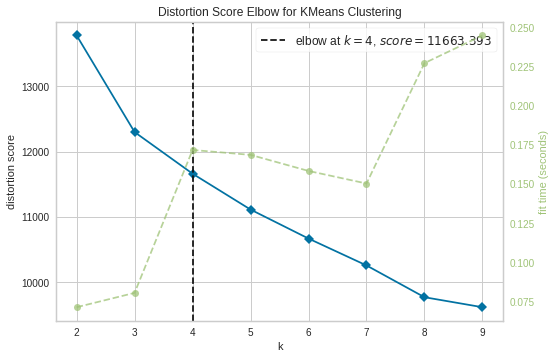

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# KElbowVisualizer helps to identify the number of cluster based on Elwow method
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(x_normalized) # Fit the data to the visualizer
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_normalized)
y_kmeans = kmeans.predict(x_normalized)
labels = kmeans.labels_

fig = px.scatter(x=pca[:, 0], y=pca[:, 1], 
                 color = labels, 
                 title="2D plot of the two firt PCA axis"
                 )
fig.show()

fig = px.scatter_3d(x=pca[:, 0], y=pca[:, 1], z=pca[:, 2],
                    color = labels,
                    title="3D plot of the three PCA axis"
                    )
fig.show()

Les données ne semblent pas etre séparables. Voyons si les classes nous permettent d'identifier des patterns dans les annotations

In [ ]:
#link bewtween the predicted classes and the annotation values

fig = px.scatter_3d(data, x='AudienceEngagement_rms' ,
                    y='Persuasiveness_rms', 
                    z='PerceivedSelf-Confidence_rms', 
                    color = kmeans.labels_
                    )
fig.show()

Il semble y avoir une relation linéaire entre les trois variables. Nous testerons un regression sur ces données plus tard

In [ ]:
# relation des lables avec la variable explicative GlobalEvaluation_rms
fig = px.box(x=kmeans.labels_, y =data.GlobalEvaluation_rms.values, points='all')
fig.show()

- Les classes identifiées semblent regrouper les individus pas niveau de notes. Sur la classe 2 on remaque que ce sont les individus ayant une médianne de 72, contrairement aux deux premières classes ou la mediane tourne au tour de 69 -70.

- Toutefois, compte tenu la faible variabilté dans les données d'annotation, ceci peut ne pas etre un pattern




In [ ]:
# relation des lables avec la variable explicative Persuasiveness_rms
fig = px.box(x=kmeans.labels_, y =data.Persuasiveness_rms.values)
fig.show()

In [ ]:
# relation des lables avec la variable explicative AudienceEngagement_rms
fig = px.box(x=kmeans.labels_, y =data.AudienceEngagement_rms.values)
fig.show()

In [ ]:
# relation des lables avec la variable explicative Persuasiveness_rms
fig = px.box(x=kmeans.labels_, y =data['PerceivedSelf-Confidence_rms'].values)
fig.show()

On note également que les labels générés pas le kmeans ne permettent pas non plus de séparer les annotations en classes.  

On remarque que en dehors l'outlier identifié, ne semble pas dégager de pattern de classes

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=20)
labels = dbscan.fit_predict(x_normalized)

# Plot the clusters

fig = px.scatter(pca, x=pca[:,0], y=pca[:,1], color=labels)
fig.show()

Le DBSCAN n'arrive à identifier aucun cluster apparent

## Regression

In [ ]:
x_ = data[['Persuasiveness_rms','PerceivedSelf-Confidence_rms', 'AudienceEngagement_rms']]
y_ = data['GlobalEvaluation_rms']

In [ ]:
fig = px.scatter(x= x_['Persuasiveness_rms'],
                 y=y_)
fig.show()

In [ ]:
fig = px.scatter(x= x_['PerceivedSelf-Confidence_rms'],
                 y=y_)
fig.show()

In [ ]:
fig = px.scatter(x= x_['AudienceEngagement_rms'],
                 y=y_)
fig.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_, y_,
                                                    random_state=32, test_size=0.1,
                                                    shuffle=True
                                                    )

In [ ]:
reg = RandomForestRegressor(n_estimators = 300,
                            max_depth = 2,
                            random_state = 32
                            ).fit(x_train, y_train)
pred = reg.predict(x_test)

print('MAE :', mean_absolute_error(y_test,pred))
print('MSE :', mean_squared_error(y_test,pred))
print('Score R²: ', reg.score(x_test,y_test))

MAE : 3.6744177823627564
MSE : 24.11913821620094
Score R²:  0.5646153167463865


Il y a de toute évidence une raltion linéraire entre les annotations. Avec un peu plus de données ont pourra eventuellement améliorer cette prédiction.

### Regression features et annotations

In [ ]:
# Rapel x = ensemble des features extraits des éries temporelles
x

,amplitude,energy,entropy,iqr,mad,min,kurtosis,skewness,slope,sma,...,nowcast_mom,nowcast_ma,nowcast_lag,nowcast_macd,nowcast_macdsign,nowcast_macddiff,seasonal_period,trend_mag,seasonality_mag,residual_std
0,940.100003,32.573503,7.366322,0.502424,0.238387,5.184130,-0.361586,0.483521,0.000575,5.707320,...,-0.018323,5.699712,5.707719,-0.000553,0.003471,0.000223,7,-0.002379,0.0,0.041088
1,941.429999,32.210184,7.375039,0.287504,0.144784,5.084001,-0.604238,-0.069218,0.001886,5.675402,...,0.011379,5.678547,5.673989,0.006513,0.007061,-0.002096,7,0.005161,0.0,0.032458
2,928.290003,31.766120,7.366322,0.510942,0.242082,5.016294,-0.613468,0.079030,0.001454,5.636144,...,0.010025,5.619769,5.613412,0.004533,0.002431,0.003111,7,0.000417,0.0,0.054882
3,811.499997,27.155327,7.285402,0.422083,0.211722,4.252874,-0.240822,-0.473311,0.002113,5.211077,...,0.023152,5.215149,5.202434,0.014904,0.013838,-0.002105,7,0.007992,0.0,0.045445
4,905.499996,30.937824,7.348728,0.364482,0.177480,4.960355,-0.428566,-0.448368,0.002673,5.562178,...,0.005958,5.555152,5.549480,0.007841,0.007650,0.000809,7,0.001050,0.0,0.030575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,890.320005,29.212858,7.366322,0.409172,0.209530,4.721621,0.291817,0.394299,0.003235,5.404892,...,0.014674,5.404090,5.398956,0.014758,0.016590,-0.002589,7,0.007272,0.0,0.050628
241,934.529996,32.993155,7.348728,0.606620,0.233835,5.001704,-1.026855,-0.524690,0.000027,5.743967,...,0.000133,5.725906,5.723400,-0.001826,-0.002779,0.005511,7,-0.002832,0.0,0.035053
242,894.509999,30.655321,7.339850,0.555699,0.258314,4.620336,-0.459079,-0.260283,0.002107,5.536725,...,-0.016421,5.516373,5.520159,0.005368,0.008342,0.004880,7,-0.005944,0.0,0.051392
243,978.679997,34.850377,7.375039,0.479304,0.244684,5.365293,-0.117998,0.311495,0.001838,5.903421,...,0.030395,5.888194,5.872327,0.002429,0.000454,0.002895,7,0.002805,0.0,0.042902


In [ ]:
y = data[['Persuasiveness_rms','PerceivedSelf-Confidence_rms', 
          'AudienceEngagement_rms', 'GlobalEvaluation_rms']
         ]

In [ ]:
def regress_on_annotation(x, annotation_col, estimator, norm=True):
  if norm:
    x = StandardScaler().fit_transform(x)

  x_train, x_test, y_train, y_test = train_test_split(x, y[annotation_col],
                                                    random_state=32, test_size=0.1,
                                                    shuffle=True)
  
  reg = estimator.fit(x_train, y_train)
  pred = estimator.predict(x_test)

  print('MAE :', mean_absolute_error(y_test,pred))
  print('MSE :', mean_squared_error(y_test,pred))
  print('Score R² : ', reg.score(x_test,y_test))



In [ ]:
estimator = RandomForestRegressor(n_estimators = 100,
                            max_depth = 2,
                            random_state = 32
                            )

In [ ]:
regress_on_annotation(x, 'Persuasiveness_rms', estimator, True)

MAE : 0.40968201823863515
MSE : 0.29176501980606206
Score R² :  -0.20827918504905618


In [ ]:
regress_on_annotation(x, 'PerceivedSelf-Confidence_rms', estimator)

MAE : 0.39533482688090016
MSE : 0.24094984499559147
Score R² :  -0.21076149987002046


In [ ]:
regress_on_annotation(x, 'AudienceEngagement_rms', estimator)

MAE : 0.3424357939175902
MSE : 0.18336795329517444
Score R² :  -0.24111160638416962


In [ ]:
regress_on_annotation(x, 'GlobalEvaluation_rms', estimator)

MAE : 6.659025065110044
MSE : 69.71133025663899
Score R² :  -0.25838847022269373


Le R2 negatif veux dire que les features ne suffisent pas pour expliquer la variable y.   Plus de données pourraient potentiellement améliorer le R² dans le cadre de la regression.  

Toutefois, on peut considerer les autres métriques.

Si on considère le problème comme une régression, on peut explorer la piste d'une regression par étape (une sorte de MultiOutputRegressor) qui prédit chauqe variable individuellemnt.  
On poura ensuite utiliser les prédictions pour prédire le score global (ou bien le prédire directement aussi)